In [45]:
from selenium import webdriver
import numpy as np

import time
from selenium import webdriver

from selenium.webdriver.common.by import By

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support.expected_conditions import presence_of_element_located

from selenium.webdriver.support import expected_conditions
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
import pandas as pd

In [46]:
df2 = pd.read_csv(r'A:\Учёба\практика 2 курс\tv\data_citilink.csv')
df1 = pd.read_csv(r'A:\Учёба\практика 2 курс\tv\data_eldorado.csv')

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

dict_tv = {}

# Список для хранения минимальных расстояний
price = {}

df_1 = pd.DataFrame(columns=['num','rating','price', 'class'])

df_2 = pd.DataFrame(columns=['num','rating','price', 'class'])


num = {'num','class'}

def levenshtein_distance(str1, str2):
    # Инициализация матрицы расстояний
    matrix = [[0] * (len(str2) + 1) for _ in range(len(str1) + 1)]

    # Заполнение первой строки и первого столбца
    for i in range(len(str1) + 1):
        matrix[i][0] = i
    for j in range(len(str2) + 1):
        matrix[0][j] = j

    # Вычисление расстояния Левенштейна
    for i in range(1, len(str1) + 1):
        for j in range(1, len(str2) + 1):
            cost = 0 if str1[i - 1] == str2[j - 1] else 1
            matrix[i][j] = min(
                matrix[i - 1][j] + 1,  # Удаление
                matrix[i][j - 1] + 1,  # Вставка
                matrix[i - 1][j - 1] + cost,  # Замена
            )

    # Возвращение значения расстояния Левенштейна для последних символов
    return matrix[-1][-1]

# Вычисление расстояний Левенштейна и поиск наименьшего расстояния
for idx, name_1 in enumerate(df1['Название']):
    min_distance = 100
    matched_name = ''

    for name_2 in df2["Название"]:
        distance = levenshtein_distance(name_1, name_2)
        if distance < min_distance:
            min_distance = distance
            matched_name = name_2


    df_1.loc[idx] = [df1['Количество отзывов'][min_distance], df1['Рейтинг'][min_distance], df1['Цена'][min_distance], 1]
    df_2.loc[idx] = [df2['Количество отзывов'][min_distance], df2['Рейтинг'][min_distance], df2['Цена'][min_distance], 2]

    #print(min_num)
    #print(min_distance , name_1, df1['Цена'][min_distance]," | ", matched_name, df2['Цена'][min_distance])




In [48]:
df_1.head(100)

,num,rating,price,class
0,4.0,0.0,0.0,1.0
1,15.0,0.0,49990.0,1.0
2,1.0,0.0,23890.0,1.0
3,16.0,0.0,52990.0,1.0
4,12.0,0.0,44990.0,1.0
...,...,...,...,...
95,1.0,0.0,23890.0,1.0
96,15.0,0.0,47990.0,1.0
97,17.0,0.0,39390.0,1.0
98,20.0,0.0,30990.0,1.0


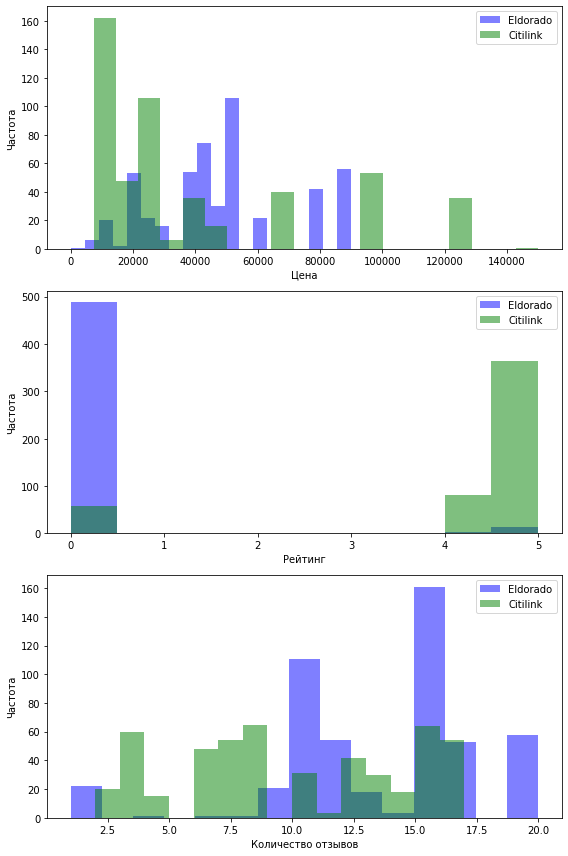

In [49]:
import matplotlib.pyplot as plt

# Данные для товаров из первого магазина (df1)
prices1 = df_1['price']
ratings1 = df_1['rating']
reviews1 = df_1['num']

# Данные для товаров из второго магазина (df2)
prices2 = df_2['price']
ratings2 = df_2['rating']
reviews2 = df_2['num']

# Создание графика с тремя подграфиками (гистограммами)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

# Построение гистограммы для цен
axes[0].hist(prices1, bins=20, alpha=0.5, color='blue', label='Eldorado')
axes[0].hist(prices2, bins=20, alpha=0.5, color='green', label='Citilink')
axes[0].set_xlabel('Цена')
axes[0].set_ylabel('Частота')
axes[0].legend()

# Построение гистограммы для рейтингов
axes[1].hist(ratings1, bins=10, alpha=0.5, color='blue', label='Eldorado')
axes[1].hist(ratings2, bins=10, alpha=0.5, color='green', label='Citilink')
axes[1].set_xlabel('Рейтинг')
axes[1].set_ylabel('Частота')
axes[1].legend()

# Построение гистограммы для количества отзывов
axes[2].hist(reviews1, bins=15, alpha=0.5, color='blue', label='Eldorado')
axes[2].hist(reviews2, bins=15, alpha=0.5, color='green', label='Citilink')
axes[2].set_xlabel('Количество отзывов')
axes[2].set_ylabel('Частота')
axes[2].legend()

# Настройка межосевых промежутков
plt.tight_layout()

# Отображение графика
plt.show()


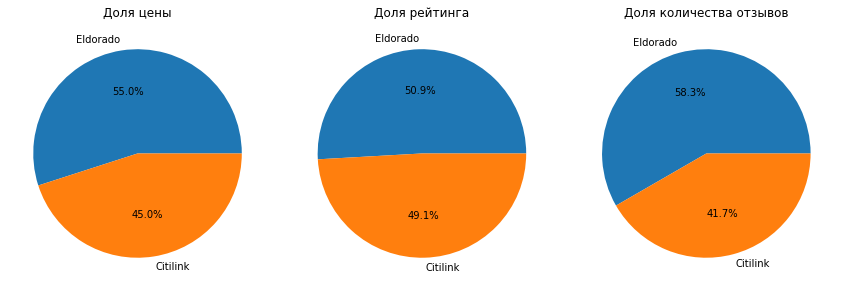

In [50]:
# Создание фигуры и осей для круговых диаграмм
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Круговая диаграмма для цены (исключая значения, равные нулю)
valid_prices1 = prices1[prices1 > 0]
valid_prices2 = prices2[prices2 > 0]
axes[0].pie([valid_prices1.sum(), valid_prices2.sum()], labels=['Eldorado', 'Citilink'], autopct='%1.1f%%')
axes[0].set_title('Доля цены')

# Круговая диаграмма для рейтингов (исключая значения, равные нулю)
valid_ratings1 = ratings1[ratings1 > 0]
valid_ratings2 = ratings2[ratings2 > 0]
axes[1].pie([valid_ratings1.mean(), valid_ratings2.mean()], labels=['Eldorado', 'Citilink'], autopct='%1.1f%%')
axes[1].set_title('Доля рейтинга')

# Круговая диаграмма для количества отзывов (исключая значения, равные нулю)
valid_reviews1 = reviews1[reviews1 > 0]
valid_reviews2 = reviews2[reviews2 > 0]
axes[2].pie([valid_reviews1.sum(), valid_reviews2.sum()], labels=['Eldorado', 'Citilink'], autopct='%1.1f%%')
axes[2].set_title('Доля количества отзывов')

# Настройка межосевых промежутков
plt.tight_layout()

# Отображение графика
plt.show()


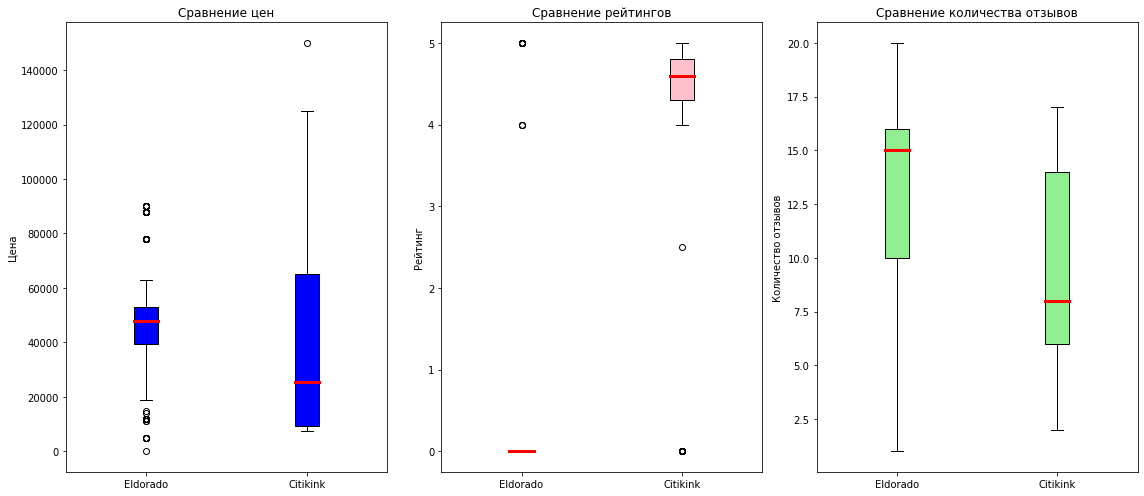

In [51]:
# Создание фигуры и осей для графика "Ящики с усами"
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))

# График "Ящики с усами" для цен
axes[0].boxplot([prices1, prices2], patch_artist=True, boxprops=dict(facecolor='blue', edgecolor='black'),  medianprops=dict(color='red', linewidth=3))
axes[0].set_xticklabels(['Eldorado', 'Citikink'])
axes[0].set_ylabel('Цена')
axes[0].set_title('Сравнение цен')

# График "Ящики с усами" для рейтингов
axes[1].boxplot([ratings1, ratings2], patch_artist=True, boxprops=dict(facecolor='pink', edgecolor='black'),  medianprops=dict(color='red', linewidth=3))
axes[1].set_xticklabels(['Eldorado', 'Citikink'])
axes[1].set_ylabel('Рейтинг')
axes[1].set_title('Сравнение рейтингов')

# График "Ящики с усами" для количества отзывов
axes[2].boxplot([reviews1, reviews2], patch_artist=True, boxprops=dict(facecolor='lightgreen', edgecolor='black'),  medianprops=dict(color='red', linewidth=3))
axes[2].set_xticklabels(['Eldorado', 'Citikink'])
axes[2].set_ylabel('Количество отзывов')
axes[2].set_title('Сравнение количества отзывов')


fig.set_size_inches(16, 7)# Настройка межосевых промежутков
plt.tight_layout()

# Отображение графика
plt.show()

Машинно обучение

In [52]:
import pandas as pd
from sklearn.cluster import KMeans

# Загрузка векторного представления из предыдущего кода
#vectorized_df = pd.read_csv('ваше_векторное_представление.csv')

# Количество кластеров
n_clusters = 5  # Замените на желаемое количество кластеров

# Применение алгоритма K-means
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(df1.drop(columns='Название'))

# Получение меток кластеров для каждого товара
cluster_labels = kmeans.labels_

# Добавление меток кластеров в исходный DataFrame
df1['Cluster'] = cluster_labels



In [53]:
# Вывод результирующего DataFrame с метками кластеров
df1['Cluster'].unique()

array([0, 4, 3, 2, 1])

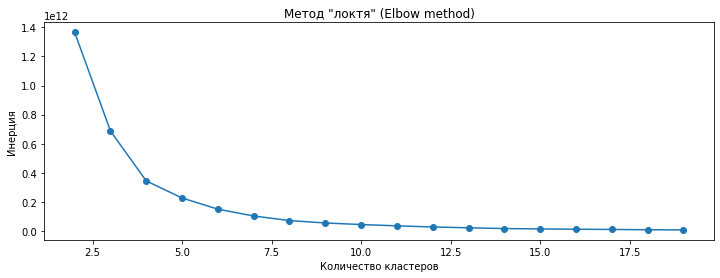

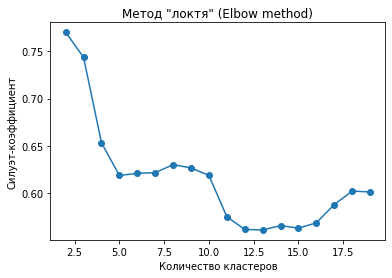

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

fig, axes = plt.subplots(figsize=(12, 4))
# Выделение признаков для кластеризации
features = df2[['Рейтинг','Цена']]  # Выберите нужные столбцы с признаками для кластеризации

# Создание списка для хранения значений инерции
inertias = []

# Создание списка для хранения значений силуэт-коэффициента
silhouette_scores = []

# Попробуйте разное количество кластеров от 1 до 10
for k in range(2, 20):
    # Создание модели K-means с текущим количеством кластеров
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)

    # Получение значения инерции
    inertia = kmeans.inertia_
    inertias.append(inertia)

    # Получение значения силуэт-коэффициента
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(features, labels)
    silhouette_scores.append(silhouette_avg)

# Вывод графика зависимости инерции от количества кластеров
plt.plot(range(2, 20), inertias, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.title('Метод "локтя" (Elbow method)')
plt.show()

# Вывод графика зависимости силуэт-коэффициента от количества кластеров
plt.plot(range(2, 20), silhouette_scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Силуэт-коэффициент')
plt.title('Метод "локтя" (Elbow method)')
plt.show()


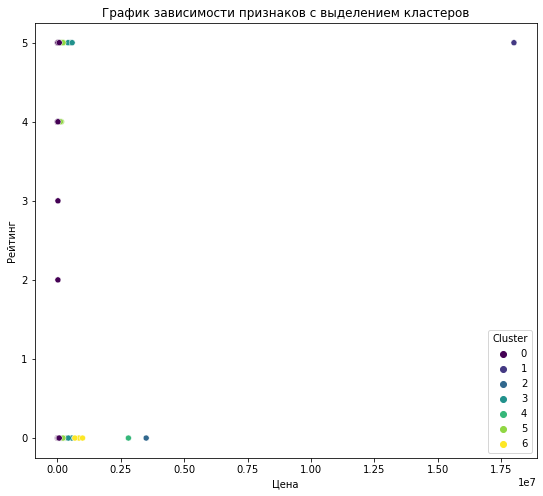

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

fig, axes = plt.subplots( figsize=(9, 8))
# Выделение признаков для кластеризации
features = df1[['Цена', 'Рейтинг']]

# Создание модели K-means с оптимальным количеством кластеров
k = 7  # Замените на оптимальное количество кластеров, выбранное на основе метода "локтя"
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(features)

# Получение меток кластеров для каждой точки
labels = kmeans.labels_

# Добавление меток кластеров в DataFrame с признаками
features_labeled = features.copy()
features_labeled['Cluster'] = labels

# Построение графика с зависимостью признаков, выделением кластеров цветом
sns.scatterplot(x='Цена', y='Рейтинг', hue='Cluster', data=features_labeled, palette='viridis')
plt.xlabel('Цена')
plt.ylabel('Рейтинг')
plt.title('График зависимости признаков с выделением кластеров')
plt.show()



In [56]:
df_1 = df1.drop(columns=['Название', 'Cluster'])
df_2 = df1.drop(columns=['Название', 'Cluster'])

In [57]:
def levenshtein_distance(str1, str2):
    # Инициализация матрицы расстояний
    matrix = [[0] * (len(str2) + 1) for _ in range(len(str1) + 1)]

    # Заполнение первой строки и первого столбца
    for i in range(len(str1) + 1):
        matrix[i][0] = i
    for j in range(len(str2) + 1):
        matrix[0][j] = j

    # Вычисление расстояния Левенштейна
    for i in range(1, len(str1) + 1):
        for j in range(1, len(str2) + 1):
            cost = 0 if str1[i - 1] == str2[j - 1] else 1
            matrix[i][j] = min(
                matrix[i - 1][j] + 1,  # Удаление
                matrix[i][j - 1] + 1,  # Вставка
                matrix[i - 1][j - 1] + cost,  # Замена
            )

    # Возвращение значения расстояния Левенштейна для последних символов
    return matrix[-1][-1]

In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Цена                         504 non-null    float64
 1   Акустическая схема           504 non-null    int64  
 2   Таймер включения/выключения  504 non-null    float64
 3   Разъем для наушников         504 non-null    float64
 4   Встроенный сабвуфер          504 non-null    float64
 5   Прогрессивная развертка      504 non-null    float64
 6   Вес без подставки            504 non-null    float64
 7   Время отклика пикселя        504 non-null    float64
 8   Гарантия                     504 non-null    float64
 9   Разрешение                   504 non-null    int64  
 10  Поддержка NFC                504 non-null    float64
 11  Управление со смартфона      504 non-null    float64
 12  Встроенный Wi-Fi             504 non-null    float64
 13  Встроенный Bluetooth

In [59]:
df1.columns

Index(['Цена', 'Акустическая схема', 'Таймер включения/выключения',
       'Разъем для наушников', 'Встроенный сабвуфер',
       'Прогрессивная развертка', 'Вес без подставки', 'Время отклика пикселя',
       'Гарантия', 'Разрешение', 'Поддержка NFC', 'Управление со смартфона',
       'Встроенный Wi-Fi', 'Встроенный Bluetooth', 'Поддержка HDR',
       'Контрастность', 'Размер VESA', 'Телетекст', 'Яркость экрана',
       'Мощность сабвуфера', 'Частота обновления', 'Родительский контроль',
       'Диагональ', 'Страна производитель', 'Операционная система', 'Название',
       'Соотношение сторон', 'Объем встроенной памяти',
       'Объем оперативной памяти', 'Рейтинг', 'Количество отзывов',
       'Тип панели', 'Цвет', 'Цифровое шумоподавление', 'Cluster'],
      dtype='object')

In [60]:
from sklearn.preprocessing import MinMaxScaler

df_1_norm = df1
df_2_norm = df2




In [61]:
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cityblock
from scipy.spatial.distance import minkowski
from scipy.spatial.distance import cosine
from scipy.spatial.distance import jaccard
from scipy.spatial import distance
# Создаем функцию для нахождения k ближайших соседей
def find_k_nearest_neighbors(query_object, data, k):
    distances = []
    for i, obj in enumerate(data):
        dist = distance.minkowski(query_object, obj)  # Евклидово расстояние между объектами
        distances.append((dist, i))  # Добавляем пару (расстояние, индекс объекта)
    
    # Сортируем расстояния по возрастанию
    distances.sort()
    
    # Находим индексы k ближайших соседей
    k_nearest_indices = [index for (_, index) in distances[:k]]
    
    return k_nearest_indices


df_1 = pd.DataFrame(columns=['num','rating','price', 'class'])

df_2 = pd.DataFrame(columns=['num','rating','price', 'class'])

# Предположим, что товары в базах данных представлены столбцами 'feature1', 'feature2', ...
features_db1 = df_1_norm.drop(columns=['Название', 'Cluster']).values
features_db2 = df_2_norm.drop(columns='Название').values

#print(features_db2[1])
# Для каждого товара из db1 находим наиболее похожий товар из db2
k = 3  # Количество ближайших соседей
similar_items = []
for i, item_db1 in enumerate(features_db1):
    
    k_nearest_indices = find_k_nearest_neighbors(item_db1, features_db2, k)

    
    for o in range(0, 3):
        ans = levenshtein_distance(df1['Название'][i], df2['Название'][k_nearest_indices[o]])
        #print(ans)
        #print(ans, df1['Название'][i], " | ", df2['Название'][k_nearest_indices[j][o]])


    df_1.loc[i] = [df1['Количество отзывов'][ans], df1['Рейтинг'][ans], df1['Цена'][ans], 1]
    df_2.loc[i] = [df2['Количество отзывов'][ans], df2['Рейтинг'][ans], df2['Цена'][ans], 2]



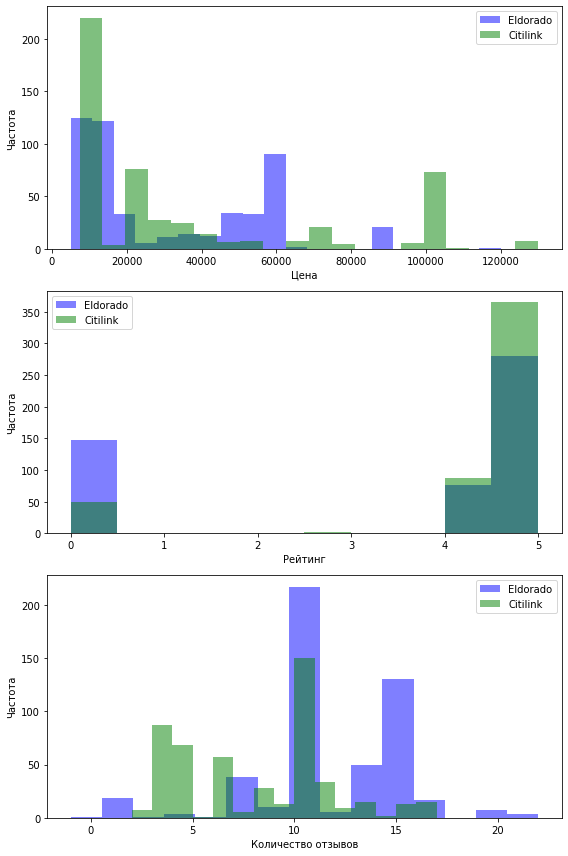

In [62]:
import matplotlib.pyplot as plt

# Данные для товаров из первого магазина (df1)
prices1 = df_1['price']
ratings1 = df_1['rating']
reviews1 = df_1['num']

# Данные для товаров из второго магазина (df2)
prices2 = df_2['price']
ratings2 = df_2['rating']
reviews2 = df_2['num']

# Создание графика с тремя подграфиками (гистограммами)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

# Построение гистограммы для цен
axes[0].hist(prices1, bins=20, alpha=0.5, color='blue', label='Eldorado')
axes[0].hist(prices2, bins=20, alpha=0.5, color='green', label='Citilink')
axes[0].set_xlabel('Цена')
axes[0].set_ylabel('Частота')
axes[0].legend()

# Построение гистограммы для рейтингов
axes[1].hist(ratings1, bins=10, alpha=0.5, color='blue', label='Eldorado')
axes[1].hist(ratings2, bins=10, alpha=0.5, color='green', label='Citilink')
axes[1].set_xlabel('Рейтинг')
axes[1].set_ylabel('Частота')
axes[1].legend()

# Построение гистограммы для количества отзывов
axes[2].hist(reviews1, bins=15, alpha=0.5, color='blue', label='Eldorado')
axes[2].hist(reviews2, bins=15, alpha=0.5, color='green', label='Citilink')
axes[2].set_xlabel('Количество отзывов')
axes[2].set_ylabel('Частота')
axes[2].legend()

# Настройка межосевых промежутков
plt.tight_layout()

# Отображение графика
plt.show()

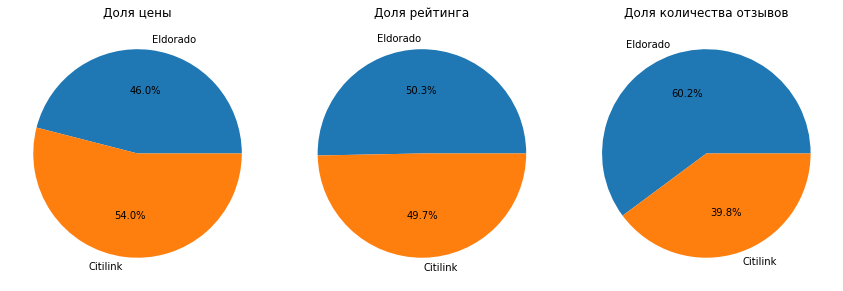

In [63]:
# Создание фигуры и осей для круговых диаграмм
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Круговая диаграмма для цены (исключая значения, равные нулю)
valid_prices1 = prices1[prices1 > 0]
valid_prices2 = prices2[prices2 > 0]
axes[0].pie([valid_prices1.sum(), valid_prices2.sum()], labels=['Eldorado', 'Citilink'], autopct='%1.1f%%')
axes[0].set_title('Доля цены')

# Круговая диаграмма для рейтингов (исключая значения, равные нулю)
valid_ratings1 = ratings1[ratings1 > 0]
valid_ratings2 = ratings2[ratings2 > 0]
axes[1].pie([valid_ratings1.mean(), valid_ratings2.mean()], labels=['Eldorado', 'Citilink'], autopct='%1.1f%%')
axes[1].set_title('Доля рейтинга')

# Круговая диаграмма для количества отзывов (исключая значения, равные нулю)
valid_reviews1 = reviews1[reviews1 > 0]
valid_reviews2 = reviews2[reviews2 > 0]
axes[2].pie([valid_reviews1.sum(), valid_reviews2.sum()], labels=['Eldorado', 'Citilink'], autopct='%1.1f%%')
axes[2].set_title('Доля количества отзывов')

# Настройка межосевых промежутков
plt.tight_layout()

# Отображение графика
plt.show()


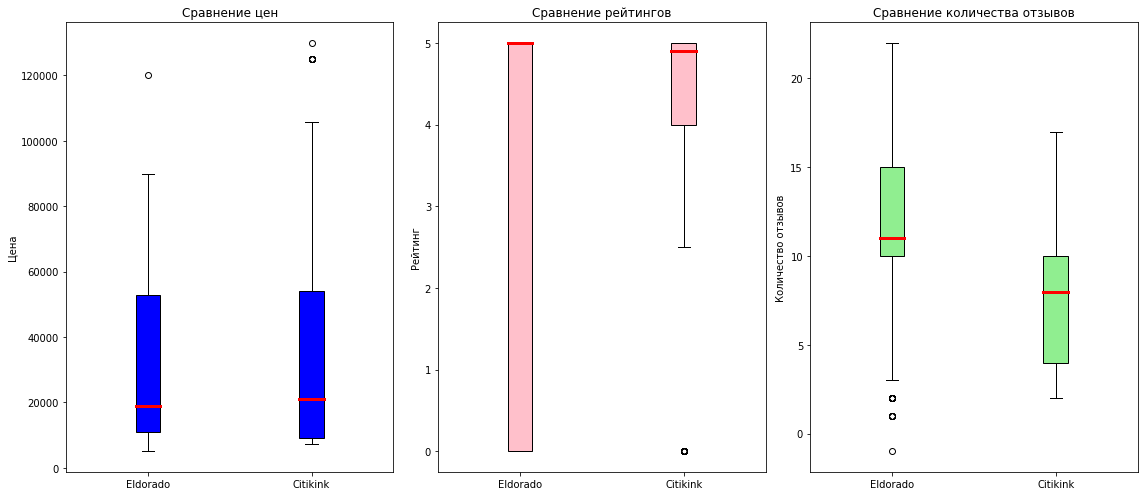

In [64]:
# Создание фигуры и осей для графика "Ящики с усами"
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))

# График "Ящики с усами" для цен
axes[0].boxplot([prices1, prices2], patch_artist=True, boxprops=dict(facecolor='blue', edgecolor='black'),  medianprops=dict(color='red', linewidth=3))
axes[0].set_xticklabels(['Eldorado', 'Citikink'])
axes[0].set_ylabel('Цена')
axes[0].set_title('Сравнение цен')

# График "Ящики с усами" для рейтингов
axes[1].boxplot([ratings1, ratings2], patch_artist=True, boxprops=dict(facecolor='pink', edgecolor='black'),  medianprops=dict(color='red', linewidth=3))
axes[1].set_xticklabels(['Eldorado', 'Citikink'])
axes[1].set_ylabel('Рейтинг')
axes[1].set_title('Сравнение рейтингов')

# График "Ящики с усами" для количества отзывов
axes[2].boxplot([reviews1, reviews2], patch_artist=True, boxprops=dict(facecolor='lightgreen', edgecolor='black'),  medianprops=dict(color='red', linewidth=3))
axes[2].set_xticklabels(['Eldorado', 'Citikink'])
axes[2].set_ylabel('Количество отзывов')
axes[2].set_title('Сравнение количества отзывов')


fig.set_size_inches(16, 7)# Настройка межосевых промежутков
plt.tight_layout()

# Отображение графика
plt.show()